In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
 homework_one_data= pd.read_csv('hw1_dataset.csv')

In [3]:
homework_one_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Model 1
## FOLD 1

In [83]:
W1= homework_one_data.iloc[0:180, 8:13]
W1.shape

(180, 5)

In [84]:
Y1 = homework_one_data.iloc[0:180, 13:14]
y = np.array(Y1[['y']])
y.shape





(180, 1)

In [85]:
W1 = np.array(W1)
W1[0:5]


array([[0. , 2.3, 3. , 0. , 6. ],
       [1. , 1.5, 2. , 3. , 3. ],
       [1. , 2.6, 2. , 2. , 7. ],
       [0. , 3.5, 3. , 0. , 3. ],
       [0. , 1.4, 1. , 0. , 3. ]])

In [86]:
import random

def initialize_betas(dim):
    b = 1
    w = np.zeros(dim)
    return b,w

b,w = initialize_betas(W1.shape[1])
print(b,w)

1 [0. 0. 0. 0. 0.]


In [87]:
def sigmoid(b, w ,W1):
    Z = b + np.matmul(W1,w)
    return (1.0 / (1 + np.exp(-Z)))

y_hat = sigmoid(b,w,W1)

y_hat[0:5]

array([0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858])

In [88]:
def get_cost( y, y_hat):
      #return np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))
        return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))
    
get_cost( y, y_hat)

59.22810210707185

In [89]:


import pandas as pd
y=y.reshape(len(y), )
current_cost= get_cost(y,y_hat)

y.shape

(180,)

In [90]:
def update_beta (b_0, w_0 , y , y_hat, W1, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), W1)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0


In [236]:
num_iterations = 100
alpha = 0.05

all_costs = []
b,w = initialize_betas(W1.shape[1])


for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , W1)
    current_cost = get_cost (y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, y, y_hat, W1, alpha)
    all_costs.append(current_cost)
   
    



In [237]:
t=range(num_iterations)
a=all_costs

In [238]:
T4= homework_one_data.iloc[180:240, 8:13]
T4 = np.array(T4)
T4[0:5]

array([[0. , 0.8, 1. , 2. , 3. ],
       [0. , 4.2, 3. , 0. , 7. ],
       [0. , 0. , 1. , 0. , 3. ],
       [0. , 0. , 1. , 2. , 3. ],
       [0. , 0.8, 3. , 0. , 7. ]])

In [239]:
T_Y4 = homework_one_data.iloc[180:240, 13:14]
T_y4 = np.array(T_Y4[['y']])
T_y4.shape

(60, 1)

In [240]:
num_iterations = 100
alpha = 0.05

all_costs_test = []
b,w = initialize_betas(T4.shape[1])


T_y4=T_y4.reshape(len(T_y4), )
current_cost= get_cost(T_y4,y_hat_test)


for each_iter in range (num_iterations ):
    y_hat_test = sigmoid(b, w , T4)
    current_cost_test = get_cost (T_y4, y_hat_test)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, T_y4, y_hat_test, T4, alpha)
    all_costs_test.append(current_cost_test)
  

## FOLD 2

In [111]:
W2= homework_one_data.iloc[60:240,8:13]

W2 = np.array(W1)
W2.shape

(180, 5)

In [112]:
Y2 = homework_one_data.iloc[60:240, 13:14]
Ty2 = np.array(Y2[['y']])
Ty2.shape

(180, 1)

In [241]:
num_iterations = 100
alpha = 0.05

all_costs_2 = []
b,w = initialize_betas(W2.shape[1])


Ty2=Ty2.reshape(len(Ty2), )

for each_iter in range (num_iterations ):
    y_hat_2 = sigmoid(b, w , W2)
    current_cost_2 = get_cost (Ty2, y_hat_2)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Ty2, y_hat_2, W2, alpha)
    all_costs_2.append(current_cost_2)


In [108]:
T2= homework_one_data.iloc[240:300,8:13]
T2 = np.array(T2)
T_Y2 = homework_one_data.iloc[240:300, 13:14]
Tst_y2 = np.array(T_Y2[['y']])
print(T2.shape,Tst_y2.shape)

(60, 5) (60, 1)


In [243]:
num_iterations = 100
alpha = 0.05

all_costs_3 = []
b,w = initialize_betas(T2.shape[1])


Tst_y2=Tst_y2.reshape(len(Tst_y2), )

for each_iter in range (num_iterations ):
    y_hat_3 = sigmoid(b, w , T2)
    current_cost_3 = get_cost (Tst_y2, y_hat_3)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Tst_y2, y_hat_3, T2, alpha)
    all_costs_3.append(current_cost_3)


## FOLD 3

In [110]:
W3= homework_one_data.iloc[120:300,8:13]

W3 = np.array(W3)
W3.shape

(180, 5)

In [115]:
Y_W3 = homework_one_data.iloc[120:300, 13:14]
y_W3 = np.array(Y_W3[['y']])
y_W3.shape

(180, 1)

In [244]:
num_iterations = 100
alpha = 0.05

all_costs_4 = []
b,w = initialize_betas(W3.shape[1])


y_W3=y_W3.reshape(len(y_W3), )

for each_iter in range (num_iterations ):
    y_hat_4 = sigmoid(b, w , W3)
    current_cost_4 = get_cost (y_W3, y_hat_4)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, y_W3, y_hat_4, W3, alpha)
    all_costs_4.append(current_cost_4)
 

In [117]:
T3= homework_one_data.iloc[0:60,8:13]
T3 = np.array(T3)
Y_T3 = homework_one_data.iloc[0:60, 13:14]
y_T3 = np.array(Y_T3[['y']])
print(T3.shape,y_T3.shape)

(60, 5) (60, 1)


In [245]:
num_iterations = 100
alpha = 0.05

all_costs_5 = []
b,w = initialize_betas(T3.shape[1])


y_T3=y_T3.reshape(len(y_T3), )

for each_iter in range (num_iterations ):
    y_hat_5 = sigmoid(b, w , T3)
    current_cost_5 = get_cost (y_T3, y_hat_5)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, y_T3, y_hat_5, T3, alpha)
    all_costs_5.append(current_cost_5)
  

## FOLD 4

In [119]:
w4= homework_one_data.iloc[180:300,8:13]
ww4 =homework_one_data.iloc[0:60,8:13]
W4 = w4.append(ww4)
W4 = np.array(W4)
W4.shape

(180, 5)

In [120]:
Y_w4=homework_one_data.iloc[180:300, 13:14]
Y_ww4=homework_one_data.iloc[0:60,13:14]
Y_W4 = Y_w4.append(Y_ww4)
y_W4 = np.array(Y_W4[['y']])
y_W4.shape

(180, 1)

In [246]:
num_iterations = 100
alpha = 0.05

all_costs_6 = []
b,w = initialize_betas(W4.shape[1])


y_W4=y_W4.reshape(len(y_W4), )

for each_iter in range (num_iterations ):
    y_hat_6 = sigmoid(b, w , W4)
    current_cost_6 = get_cost (y_W4, y_hat_6)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, y_W4, y_hat_6, W4, alpha)
    all_costs_6.append(current_cost_6)
    

In [122]:
T4= homework_one_data.iloc[60:120,8:13]
T4 = np.array(T4)
Y_T4 = homework_one_data.iloc[60:120, 13:14]
y_T4 = np.array(Y_T4[['y']])
print(T4.shape,y_T4.shape)

(60, 5) (60, 1)


In [247]:
num_iterations = 100
alpha = 0.05

all_costs_7 = []
b,w = initialize_betas(T4.shape[1])


y_T4=y_T4.reshape(len(y_T4), )

for each_iter in range (num_iterations ):
    y_hat_7 = sigmoid(b, w , T4)
    current_cost_7 = get_cost (y_T4, y_hat_7)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, y_T4, y_hat_7, T4, alpha)
    all_costs_7.append(current_cost_7)


## FOLD 5

In [ ]:
def sigmoid(b, w ,W1):
    Z = b + np.matmul(W1,w)
    return (1.0 / (1 + np.exp(-Z)))

y_hat = sigmoid(b,w,W1)

y_hat[0:5]

In [131]:
## training fold

w5= homework_one_data.iloc[240:300,8:13]
ww5 =homework_one_data.iloc[0:120,8:13]
W5 = w5.append(ww5)
W5 = np.array(W5)

Y_w5=homework_one_data.iloc[240:300, 13:14]
Y_ww5=homework_one_data.iloc[0:120,13:14]
Y_W5 = Y_w5.append(Y_ww5)
y_W5 = np.array(Y_W5[['y']])
print(W5.shape,y_W5.shape)

## testing fold

T5= homework_one_data.iloc[120:180,8:13]
T5 = np.array(T5)
Y_T5 = homework_one_data.iloc[120:180, 13:14]
y_T5 = np.array(Y_T5[['y']])
print(T5.shape,y_T5.shape)



(180, 5) (180, 1)
(60, 5) (60, 1)


In [257]:
def fold(W10,y_W10,T10,y_T10):
    num_iterations = 100
    alpha = 0.05

    all_costs_10 = []
    p =all_costs_10
    b,w = initialize_betas(W10.shape[1])
    print("initial guess of b and w: " , b ,w)

    y_W10=y_W10.reshape(len(y_W10), )

    for each_iter in range (num_iterations ):
        y_hat_10 = sigmoid(b, w , W10)
        current_cost_10 = get_cost (y_W10, y_hat_10)
        prev_b = b
        prev_w = w
        b, w = update_beta (prev_b, prev_w, y_W10, y_hat_10, W10, alpha)
        all_costs_10.append(current_cost_10)
        if each_iter % 5 == 0:
            print('Iteration_training: ', each_iter, 'Cost_traing: ', current_cost_10)
            each_iter += 1
    
   
    print("Final estimates of b and q are: ", b,w)
    

    num_iterations = 100
    alpha = 0.05

    all_costs_11 = []
    q=all_costs_11
    b,w = initialize_betas(T10.shape[1])
    print("initial guess of b and w: " , b ,w)

    y_T10=y_T10.reshape(len(y_T10), )

    for each_iter in range (num_iterations ):
        y_hat_11 = sigmoid(b, w , T10)
        current_cost_11 = get_cost (y_T10, y_hat_11)
        prev_b = b
        prev_w = w
        b, w = update_beta (prev_b, prev_w, y_T10, y_hat_11, T10, alpha)
        all_costs_11.append(current_cost_11)
        if each_iter % 5 == 0:
            print('Iteration_testing: ', each_iter, 'Cost_testing: ', current_cost_11)
            each_iter += 1
    
    
    return print("Final estimates of b and q are: ", b,w)
    




In [ ]:
num_iterations = 100
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

In [216]:
r=fold_training(W5,y_W5)
s=fold_testing(T5,y_T5)


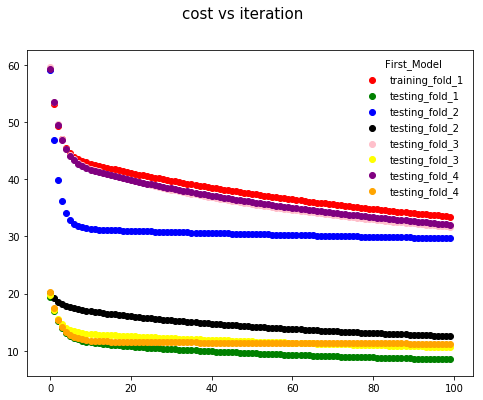

In [248]:
t=range(num_iterations)
a=all_costs
b=all_costs_test
c=all_costs_2
d=all_costs_3
e=all_costs_4
f=all_costs_5
g=all_costs_6
h=all_costs_7
import matplotlib.pyplot as plt


# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('cost vs iteration', fontsize=15)

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.scatter(t, a, color="red", label="training_fold_1")
ax.scatter(t, b, color="green", label="testing_fold_1")
ax.scatter(t, c, color="blue", label="testing_fold_2")
ax.scatter(t, d, color="black", label="testing_fold_2")
ax.scatter(t, e, color="pink", label="testing_fold_3")
ax.scatter(t, f, color="yellow", label="testing_fold_3")
ax.scatter(t, g, color="purple", label="testing_fold_4")
ax.scatter(t, h, color="orange", label="testing_fold_4")

# Add a legend, and position it on the lower right (with no box)
plt.legend( title="First_Model", frameon=False)

plt.show()

## MODEL 2

In [165]:
## fold 1
## training
W11= homework_one_data.iloc[0:180, [1,2,8,9]]
W11 = np.array(W11)
Y_W11 = homework_one_data.iloc[0:180, 13:14]
y_W11 = np.array(Y_W11[['y']])
y_W11.shape
## testing 
T11= homework_one_data.iloc[180:240,[1,2,8,9]]
T11 = np.array(T11)
Y_T11 = homework_one_data.iloc[180:240, 13:14]
y_T11 = np.array(Y_T11[['y']])

print(W11.shape,y_W11.shape,T11.shape,y_T11.shape)

(180, 4) (180, 1) (60, 4) (60, 1)


In [258]:
## call the function 
fold(W11,y_W11,T11,y_T11)


initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.22810210707185
Iteration_training:  5 Cost_traing:  46.10024897235838
Iteration_training:  10 Cost_traing:  40.9516578811537
Iteration_training:  15 Cost_traing:  38.76578603295742
Iteration_training:  20 Cost_traing:  37.678105947520535
Iteration_training:  25 Cost_traing:  37.01821554210873
Iteration_training:  30 Cost_traing:  36.53800795588622
Iteration_training:  35 Cost_traing:  36.14295041722925
Iteration_training:  40 Cost_traing:  35.79562391644211
Iteration_training:  45 Cost_traing:  35.48018760806124
Iteration_training:  50 Cost_traing:  35.189112834864204
Iteration_training:  55 Cost_traing:  34.91818889001096
Iteration_training:  60 Cost_traing:  34.66462411579002
Iteration_training:  65 Cost_traing:  34.42631073288245
Iteration_training:  70 Cost_traing:  34.201529447619905
Iteration_training:  75 Cost_traing:  33.98882170937172
Iteration_training:  80 Cost_traing:  33.786927038952456
Iter

In [168]:
## fold 2
## training
W12= homework_one_data.iloc[60:240, [1,2,8,9]]
W12 = np.array(W12)
Y_W12 = homework_one_data.iloc[60:240, 13:14]
y_W12 = np.array(Y_W12[['y']])
y_W12.shape
## testing 
T12= homework_one_data.iloc[240:300,[1,2,8,9]]
T12 = np.array(T12)
Y_T12 = homework_one_data.iloc[240:300, 13:14]
y_T12 = np.array(Y_T12[['y']])

print(W12.shape,y_W12.shape,T12.shape,y_T12.shape)
## call the function 
fold(W12,y_W12,T12,y_T12)


(180, 4) (180, 1) (60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.096775938320036
Iteration_training:  5 Cost_traing:  45.30412727713322
Iteration_training:  10 Cost_traing:  39.7191766928818
Iteration_training:  15 Cost_traing:  37.227714947352645
Iteration_training:  20 Cost_traing:  35.910447717019274
Iteration_training:  25 Cost_traing:  35.0699976848058
Iteration_training:  30 Cost_traing:  34.44354094648998
Iteration_training:  35 Cost_traing:  33.9277615417434
Iteration_training:  40 Cost_traing:  33.47958457950096
Iteration_training:  45 Cost_traing:  33.079264859900206
Iteration_training:  50 Cost_traing:  32.716413962762324
Iteration_training:  55 Cost_traing:  32.38462973319464
Iteration_training:  60 Cost_traing:  32.07938748096441
Iteration_training:  65 Cost_traing:  31.797179997499455
Iteration_training:  70 Cost_traing:  31.535142234576092
Iteration_training:  75 Cost_traing:  31.290868578825812
Iteration_training:  80 

In [170]:
## fold 3
## training
W13= homework_one_data.iloc[120:300, [1,2,8,9]]
W13 = np.array(W13)
Y_W13 = homework_one_data.iloc[120:300, 13:14]
y_W13 = np.array(Y_W13[['y']])
y_W13.shape
## testing 
T13= homework_one_data.iloc[0:60,[1,2,8,9]]
T13 = np.array(T13)
Y_T13 = homework_one_data.iloc[0:60, 13:14]
y_T13 = np.array(Y_T13[['y']])

print(W13.shape,y_W13.shape,T13.shape,y_T13.shape)
## call the function 
fold(W13,y_W13,T13,y_T13)

(180, 4) (180, 1) (60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.534529834159436
Iteration_training:  5 Cost_traing:  46.80276487006114
Iteration_training:  10 Cost_traing:  41.39033890557322
Iteration_training:  15 Cost_traing:  38.88889409304043
Iteration_training:  20 Cost_traing:  37.54340485022836
Iteration_training:  25 Cost_traing:  36.683298045618734
Iteration_training:  30 Cost_traing:  36.04538869395325
Iteration_training:  35 Cost_traing:  35.5227393632753
Iteration_training:  40 Cost_traing:  35.0697463915402
Iteration_training:  45 Cost_traing:  34.66538290403129
Iteration_training:  50 Cost_traing:  34.298742954539975
Iteration_training:  55 Cost_traing:  33.96328527976197
Iteration_training:  60 Cost_traing:  33.654504160695005
Iteration_training:  65 Cost_traing:  33.36896117865702
Iteration_training:  70 Cost_traing:  33.10386280559174
Iteration_training:  75 Cost_traing:  32.85686047117915
Iteration_training:  80 Cos

In [173]:
## fold 4
## training fold

w14= homework_one_data.iloc[240:300,[1,2,8,9]]
ww14 =homework_one_data.iloc[0:120,[1,2,8,9]]
W14 = w14.append(ww14)
W14 = np.array(W14)

Y_w14=homework_one_data.iloc[240:300, 13:14]
Y_ww14=homework_one_data.iloc[0:120,13:14]
Y_W14 = Y_w14.append(Y_ww14)
y_W14 = np.array(Y_W14[['y']])
print(W14.shape,y_W14.shape)

## testing fold

T14= homework_one_data.iloc[120:180,[1,2,8,9]]
T14 = np.array(T14)
Y_T14 = homework_one_data.iloc[120:180, 13:14]
y_T14 = np.array(Y_T14[['y']])
print(T14.shape,y_T14.shape)
## call the function 
fold(W14,y_W14,T14,y_T14)


(180, 4) (180, 1)
(60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.73881498555116
Iteration_training:  5 Cost_traing:  48.65538809050567
Iteration_training:  10 Cost_traing:  44.05283971501039
Iteration_training:  15 Cost_traing:  41.98719825096259
Iteration_training:  20 Cost_traing:  40.90437313590277
Iteration_training:  25 Cost_traing:  40.218481332727926
Iteration_training:  30 Cost_traing:  39.70555445343891
Iteration_training:  35 Cost_traing:  39.27794534889965
Iteration_training:  40 Cost_traing:  38.90001704549665
Iteration_training:  45 Cost_traing:  38.556232771641525
Iteration_training:  50 Cost_traing:  38.238977715494656
Iteration_training:  55 Cost_traing:  37.94387730703651
Iteration_training:  60 Cost_traing:  37.66797842489288
Iteration_training:  65 Cost_traing:  37.40902891742207
Iteration_training:  70 Cost_traing:  37.16518104202507
Iteration_training:  75 Cost_traing:  36.93486023956604
Iteration_training:  80 Co

In [175]:
## fold 5
## training fold

w15= homework_one_data.iloc[180:300,[1,2,8,9]]
ww15 =homework_one_data.iloc[0:60,[1,2,8,9]]
W15 = w15.append(ww15)
W15 = np.array(W15)

Y_w15=homework_one_data.iloc[180:300, 13:14]
Y_ww15=homework_one_data.iloc[0:60,13:14]
Y_W15 = Y_w15.append(Y_ww15)
y_W15 = np.array(Y_W15[['y']])
print(W15.shape,y_W15.shape)

## testing fold

T15= homework_one_data.iloc[60:120,[1,2,8,9]]
T15 = np.array(T15)
Y_T15 = homework_one_data.iloc[60:120, 13:14]
y_T15 = np.array(Y_T15[['y']])
print(T15.shape,y_T15.shape)
## call the function 
fold(W15,y_W15,T15,y_T15)


(180, 4) (180, 1)
(60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.344836479295694
Iteration_training:  5 Cost_traing:  46.87184732767125
Iteration_training:  10 Cost_traing:  41.66954346313463
Iteration_training:  15 Cost_traing:  39.37664081317153
Iteration_training:  20 Cost_traing:  38.237371102747225
Iteration_training:  25 Cost_traing:  37.5727636717647
Iteration_training:  30 Cost_traing:  37.11333604137994
Iteration_training:  35 Cost_traing:  36.74943778681307
Iteration_training:  40 Cost_traing:  36.43534488043357
Iteration_training:  45 Cost_traing:  36.15129237142031
Iteration_training:  50 Cost_traing:  35.88819294335942
Iteration_training:  55 Cost_traing:  35.64143086601416
Iteration_training:  60 Cost_traing:  35.40832381693187
Iteration_training:  65 Cost_traing:  35.1870751033823
Iteration_training:  70 Cost_traing:  34.97633402988891
Iteration_training:  75 Cost_traing:  34.775005708544555
Iteration_training:  80 Cost

## Model 3

In [178]:
## fold 1
## training
W16= homework_one_data.iloc[0:180, [3,4,9,6]]
W16 = np.array(W16)
Y_W16 = homework_one_data.iloc[0:180, 13:14]
y_W16 = np.array(Y_W16[['y']])
y_W16.shape
## testing 
T16= homework_one_data.iloc[180:240,[3,4,9,6]]
T16 = np.array(T16)
Y_T16 = homework_one_data.iloc[180:240, 13:14]
y_T16 = np.array(Y_T16[['y']])

print(W16.shape,y_W16.shape,T16.shape,y_T16.shape)
## call the function 
fold(W16,y_W16,T16,y_T16)

(180, 4) (180, 1) (60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.22810210707185
Iteration_training:  5 Cost_traing:  -0.0
Iteration_training:  10 Cost_traing:  -0.0
Iteration_training:  15 Cost_traing:  nan
Iteration_training:  20 Cost_traing:  -0.0
Iteration_training:  25 Cost_traing:  -0.0
Iteration_training:  30 Cost_traing:  nan
Iteration_training:  35 Cost_traing:  -0.0
Iteration_training:  40 Cost_traing:  nan
Iteration_training:  45 Cost_traing:  -0.0
Iteration_training:  50 Cost_traing:  -0.0
Iteration_training:  55 Cost_traing:  nan
Iteration_training:  60 Cost_traing:  -0.0
Iteration_training:  65 Cost_traing:  -0.0
Iteration_training:  70 Cost_traing:  nan
Iteration_training:  75 Cost_traing:  -0.0
Iteration_training:  80 Cost_traing:  -0.0
Iteration_training:  85 Cost_traing:  nan
Iteration_training:  90 Cost_traing:  -0.0
Iteration_training:  95 Cost_traing:  -0.0
Final estimates of b and q are:  0.9604190834645704 [1.728

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
## fold 2
## training
W17= homework_one_data.iloc[60:240, [3,4,9,6]]
W17 = np.array(W17)
Y_W17 = homework_one_data.iloc[60:240, 13:14]
y_W17 = np.array(Y_W17[['y']])
y_W17.shape
## testing 
T17= homework_one_data.iloc[240:300,[3,4,9,6]]
T17 = np.array(T17)
Y_T17 = homework_one_data.iloc[240:300, 13:14]
y_T17 = np.array(Y_T17[['y']])

print(W17.shape,y_W17.shape,T17.shape,y_T17.shape)
## call the function 
fold(W17,y_W17,T17,y_T17)

(180, 4) (180, 1) (60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.096775938320036
Iteration_training:  5 Cost_traing:  -0.0
Iteration_training:  10 Cost_traing:  -0.0
Iteration_training:  15 Cost_traing:  nan
Iteration_training:  20 Cost_traing:  -0.0
Iteration_training:  25 Cost_traing:  -0.0
Iteration_training:  30 Cost_traing:  nan
Iteration_training:  35 Cost_traing:  -0.0
Iteration_training:  40 Cost_traing:  -0.0
Iteration_training:  45 Cost_traing:  nan
Iteration_training:  50 Cost_traing:  -0.0
Iteration_training:  55 Cost_traing:  nan
Iteration_training:  60 Cost_traing:  nan
Iteration_training:  65 Cost_traing:  -0.0
Iteration_training:  70 Cost_traing:  nan
Iteration_training:  75 Cost_traing:  nan
Iteration_training:  80 Cost_traing:  -0.0
Iteration_training:  85 Cost_traing:  nan
Iteration_training:  90 Cost_traing:  -0.0
Iteration_training:  95 Cost_traing:  nan
Final estimates of b and q are:  0.9025052837575299 [-1.9636

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
## fold 3
## training
W18= homework_one_data.iloc[120:300, [3,4,9,6]]
W18 = np.array(W18)
Y_W18 = homework_one_data.iloc[120:300, 13:14]
y_W18 = np.array(Y_W18[['y']])
y_W18.shape
## testing 
T18= homework_one_data.iloc[0:60,[3,4,9,6]]
T18 = np.array(T18)
Y_T18 = homework_one_data.iloc[0:60, 13:14]
y_T18 = np.array(Y_T18[['y']])

print(W18.shape,y_W18.shape,T18.shape,y_T18.shape)
## call the function 
fold(W18,y_W18,T18,y_T18)

(180, 4) (180, 1) (60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.534529834159436
Iteration_training:  5 Cost_traing:  -0.0
Iteration_training:  10 Cost_traing:  nan
Iteration_training:  15 Cost_traing:  -0.0
Iteration_training:  20 Cost_traing:  nan
Iteration_training:  25 Cost_traing:  -0.0
Iteration_training:  30 Cost_traing:  nan
Iteration_training:  35 Cost_traing:  -0.0
Iteration_training:  40 Cost_traing:  nan
Iteration_training:  45 Cost_traing:  -0.0
Iteration_training:  50 Cost_traing:  nan
Iteration_training:  55 Cost_traing:  -0.0
Iteration_training:  60 Cost_traing:  nan
Iteration_training:  65 Cost_traing:  -0.0
Iteration_training:  70 Cost_traing:  nan
Iteration_training:  75 Cost_traing:  -0.0
Iteration_training:  80 Cost_traing:  nan
Iteration_training:  85 Cost_traing:  -0.0
Iteration_training:  90 Cost_traing:  nan
Iteration_training:  95 Cost_traing:  -0.0
Final estimates of b and q are:  0.9356347265322221 [ 2.9623

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [181]:
## fold 4
## training fold

w19= homework_one_data.iloc[240:300, [3,4,9,6]]
ww19 =homework_one_data.iloc[0:120, [3,4,9,6]]
W19 = w19.append(ww19)
W19 = np.array(W19)

Y_w19=homework_one_data.iloc[240:300, 13:14]
Y_ww19=homework_one_data.iloc[0:120,13:14]
Y_W19 = Y_w19.append(Y_ww19)
y_W19 = np.array(Y_W19[['y']])
print(W19.shape,y_W19.shape)

## testing fold

T19= homework_one_data.iloc[120:180, [3,4,9,6]]
T19 = np.array(T19)
Y_T19 = homework_one_data.iloc[120:180, 13:14]
y_T19 = np.array(Y_T19[['y']])
print(T19.shape,y_T19.shape)
## call the function 
fold(W19,y_W19,T19,y_T19)


(180, 4) (180, 1)
(60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.73881498555116
Iteration_training:  5 Cost_traing:  -0.0
Iteration_training:  10 Cost_traing:  nan
Iteration_training:  15 Cost_traing:  -0.0
Iteration_training:  20 Cost_traing:  nan
Iteration_training:  25 Cost_traing:  -0.0
Iteration_training:  30 Cost_traing:  nan
Iteration_training:  35 Cost_traing:  -0.0
Iteration_training:  40 Cost_traing:  nan
Iteration_training:  45 Cost_traing:  -0.0
Iteration_training:  50 Cost_traing:  nan
Iteration_training:  55 Cost_traing:  -0.0
Iteration_training:  60 Cost_traing:  nan
Iteration_training:  65 Cost_traing:  -0.0
Iteration_training:  70 Cost_traing:  -0.0
Iteration_training:  75 Cost_traing:  nan
Iteration_training:  80 Cost_traing:  -0.0
Iteration_training:  85 Cost_traing:  nan
Iteration_training:  90 Cost_traing:  -0.0
Iteration_training:  95 Cost_traing:  nan
Final estimates of b and q are:  0.9680754751631837 [-3.12807

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
## fold 5
## training fold

w20= homework_one_data.iloc[180:300,[3,4,9,6]]
ww20 =homework_one_data.iloc[0:60,[3,4,9,6]]
W20 = w20.append(ww20)
W20 = np.array(W20)

Y_w20=homework_one_data.iloc[180:300, 13:14]
Y_ww20=homework_one_data.iloc[0:60,13:14]
Y_W20 = Y_w20.append(Y_ww20)
y_W20 = np.array(Y_W20[['y']])
print(W20.shape,y_W20.shape)

## testing fold

T20= homework_one_data.iloc[60:120,[3,4,9,6]]
T20 = np.array(T20)
Y_T20 = homework_one_data.iloc[60:120, 13:14]
y_T20 = np.array(Y_T20[['y']])
print(T20.shape,y_T20.shape)
## call the function 
fold(W20,y_W20,T20,y_T20)

(180, 4) (180, 1)
(60, 4) (60, 1)
initial guess of b and w:  1 [0. 0. 0. 0.]
Iteration_training:  0 Cost_traing:  59.344836479295694
Iteration_training:  5 Cost_traing:  -0.0
Iteration_training:  10 Cost_traing:  -0.0
Iteration_training:  15 Cost_traing:  nan
Iteration_training:  20 Cost_traing:  -0.0
Iteration_training:  25 Cost_traing:  -0.0
Iteration_training:  30 Cost_traing:  nan
Iteration_training:  35 Cost_traing:  -0.0
Iteration_training:  40 Cost_traing:  -0.0
Iteration_training:  45 Cost_traing:  nan
Iteration_training:  50 Cost_traing:  -0.0
Iteration_training:  55 Cost_traing:  -0.0
Iteration_training:  60 Cost_traing:  nan
Iteration_training:  65 Cost_traing:  -0.0
Iteration_training:  70 Cost_traing:  -0.0
Iteration_training:  75 Cost_traing:  nan
Iteration_training:  80 Cost_traing:  -0.0
Iteration_training:  85 Cost_traing:  -0.0
Iteration_training:  90 Cost_traing:  nan
Iteration_training:  95 Cost_traing:  -0.0
Final estimates of b and q are:  0.9713765580440155 [-1.2

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
